In [2]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import numpy as np

In [3]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
f = "Report_PB Pharma_20210209.xls"

In [5]:
df = pd.read_excel(f)

In [6]:
df_prices = pd.read_csv('pricing_data_lauertaxe.csv')

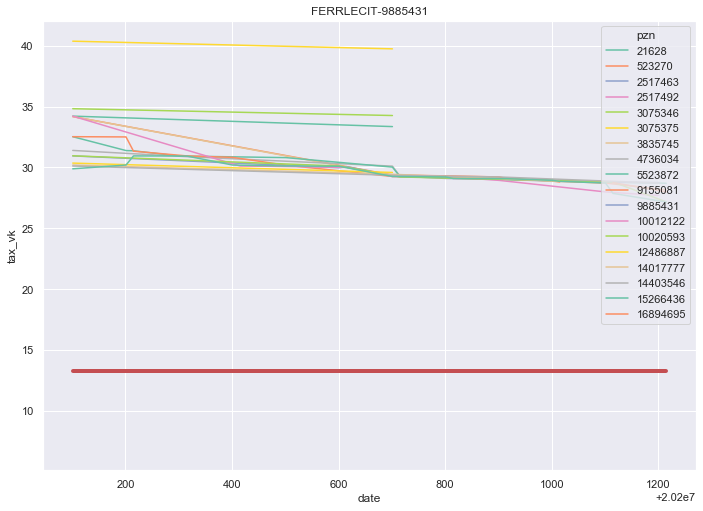

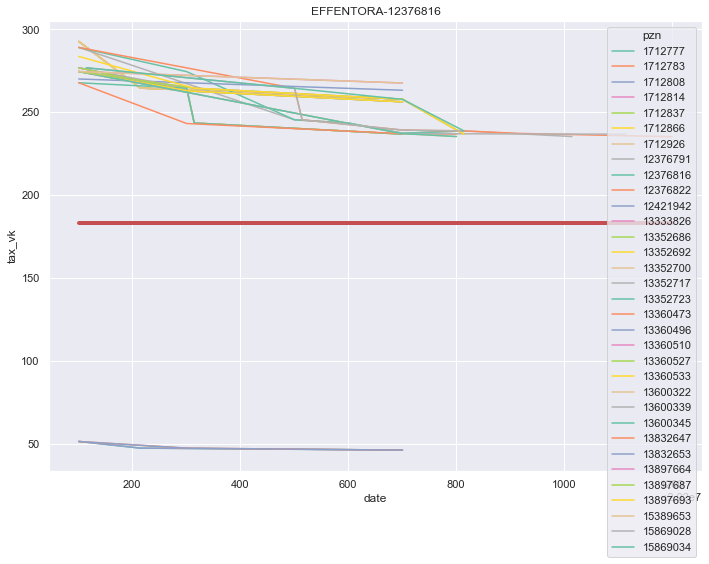

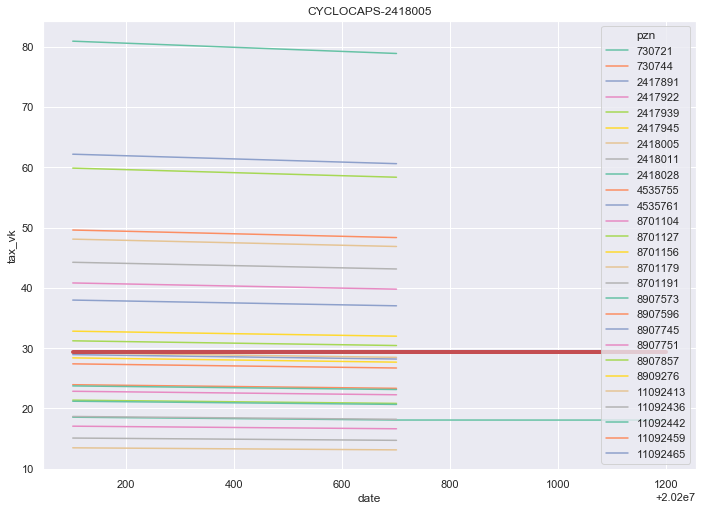

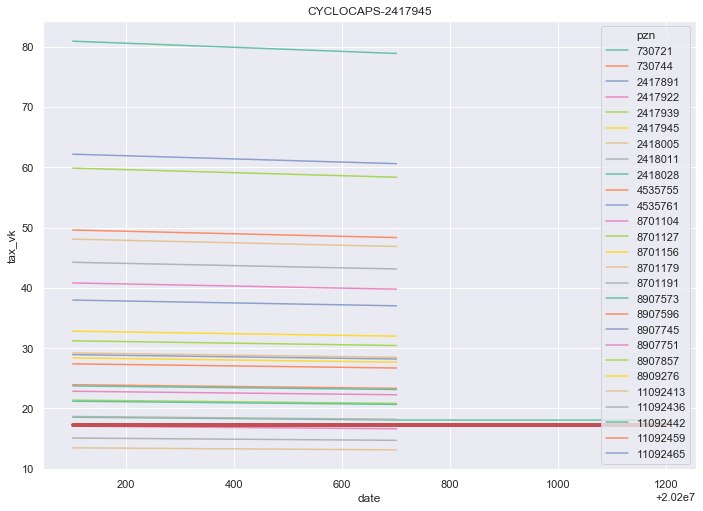

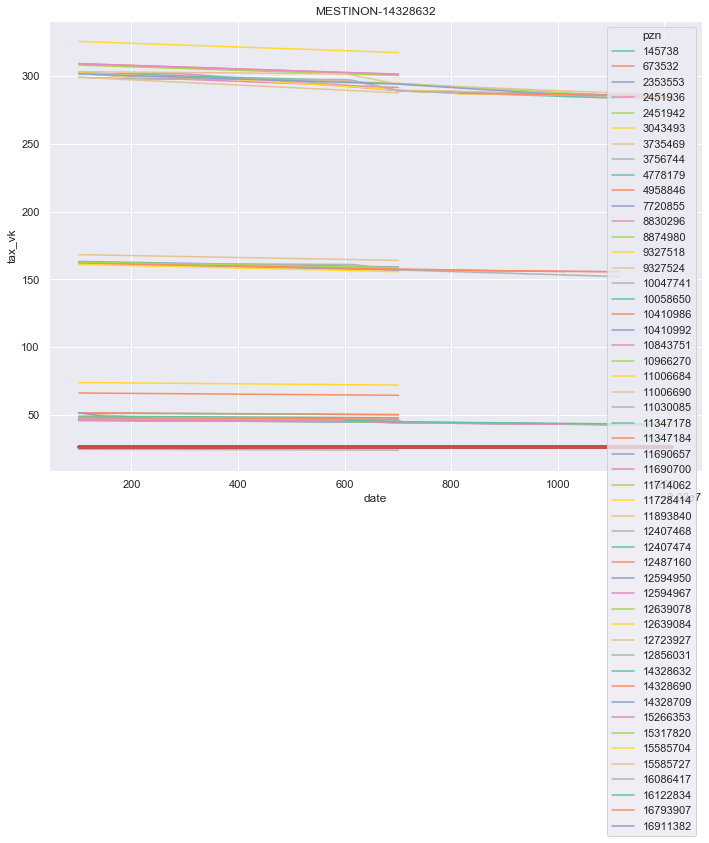

In [13]:
for pzn in df.sort_values(by=['akt. Bestand (St.)'], ascending=False).dropna().PZN.unique()[:5]:
    sample = df[df.PZN == pzn]
    name = sample.Artikelbezeichnung.str.split(' ').apply(lambda x: x[0]).unique()[0]
    pricings = df_prices[(df_prices.description.str.contains(name)) & (df_prices.date.astype(str).str.startswith('2020'))]
    sns.lineplot(
        data=pricings, 
        y='tax_vk', 
        x='date', 
        hue='pzn', 
        markers=True,
        estimator=np.mean,
        err_style="band",
        ci='sd',
        palette='Set2',
        legend=True,
    )
    plt.plot(
        pricings.date.values,
        [sample.Grosso.str.replace(',', '.').astype(float).unique()[0] for i in range(len(pricings))], 
        color='r',
        linewidth=4
    )
    plt.title(name + '-' + str(pzn))
    plt.show()